# environmental setup

In [1]:
# BASIC
import numpy as np
import xarray as xr
import pandas as pd

#xr.set_options(display_style="text") # make it look better when posted online. Comment to get nicer representation of xarrays
import os

# matplotlib
import matplotlib
#%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.tri as mtri
import matplotlib.dates as md
import matplotlib.patches as patches
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import ticker
matplotlib.rcParams['figure.dpi'] = 300
matplotlib.rcParams['axes.linewidth'] = 1.5

## color
from matplotlib import cm
import cmocean
import seaborn as sns

## cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point


# scipy
from scipy import stats
from scipy import optimize
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
from scipy.stats import binned_statistic
import scipy.spatial.qhull as qhull


# metpy
import metpy
import metpy.calc as mpcalc


# etc
import subprocess
import time
import datetime
from datetime import timedelta
import calendar


# Dask
import dask # Distributed data libary
from dask import delayed
from dask import compute
from dask_jobqueue import SLURMCluster # Setting up distributed memories via slurm
from dask.utils import format_bytes
from distributed import Client, progress # Libaray to orchestrate distributed resources
from dask.distributed import Client
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

from pathlib import Path
from getpass import getuser # Libaray to copy things
from pathlib import Path # Object oriented libary to deal with paths
from tempfile import NamedTemporaryFile, TemporaryDirectory # Creating temporary Files/Dirs
import warnings
warnings.filterwarnings(action='ignore')



In [2]:
WORK_DIR = '~/python/land_atm_coupling/land-atm_coupling_publication/'

# data

In [3]:
dpath = f'{WORK_DIR}/data/CMIP6/'
land_frac = xr.open_mfdataset(f'{dpath}/bc_land_frac_2x2.nc')

dpath = f'{WORK_DIR}/data/dpp0066/'
box_pr_smi = xr.open_mfdataset(f'{dpath}/box_pr-smi_one_sigma.nc')
box_fin = box_pr_smi['box_xr']

### ICON

In [4]:
dpath = f'{WORK_DIR}/data/dpp0066/'

dataICON1  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_pr_2x2.nc')
dataICON2  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_hfls_2x2.nc')
dataICON3  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_hfss_2x2.nc')
dataICON4  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_run_2x2.nc')
dataICON5  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rootsm_2x2.nc')
dataICON51 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rsds_2x2.nc')
dataICON52 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rsus_2x2.nc')
dataICON53 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rlds_2x2.nc')
dataICON54 = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_rlus_2x2.nc')
dataICON6  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_drain_2x2.nc')
dataICON7  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_smi_2x2.nc')
dataICON8  = xr.open_mfdataset(f'{dpath}/dpp0066_2020_full_daily_w_soil_sl0_2x2.nc')

dataICON = xr.merge([dataICON1, dataICON2, dataICON3, dataICON4, dataICON5, 
                     dataICON51, dataICON52, dataICON53, dataICON54, 
                     dataICON6, dataICON7, dataICON8,])

dataICON1 = dataICON.sel(time=slice('2020-06-01','2020-08-31'))
dataICON

<xarray.Dataset>
Dimensions:              (time: 255, lon: 180, lat: 90)
Coordinates:
  * time                 (time) datetime64[ns] 2020-01-20 ... 2020-09-30
  * lon                  (lon) float64 -179.0 -177.0 -175.0 ... 177.0 179.0
  * lat                  (lat) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
Data variables: (12/13)
    pr                   (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    hfls                 (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    hfss                 (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    run                  (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    rootsm               (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    rsds                 (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    ...                   ...
    rlds                 (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    rlus                 (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    drain                (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    smi                  (time, lat, lon) float64 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    hydro_w_soil_sl_box  (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
    hydro_w_ice_sl_box   (time, lat, lon) float32 dask.array<chunksize=(255, 90, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.3 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Nov 28 14:33:25 2022: cdo remap,/work/mh0731/m300793/da...
    CDO:          Climate Data Operators version 2.0.3 (https://mpimet.mpg.de...

In [5]:
dpath = f'{WORK_DIR}/data/dpp0066/'
dataICON_init = xr.open_mfdataset(f'{dpath}/bc_land_soil_2x2.nc')

### CMIP-LR

In [6]:
dpath     = f'{WORK_DIR}/data/CMIP6/'

dataCMIP1  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_pr_2x2.nc')
dataCMIP2  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_hfls_2x2.nc')
dataCMIP3  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_hfss_2x2.nc')
dataCMIP4  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_runoff_2x2.nc')
dataCMIP5  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rzwc_2x2.nc')
dataCMIP51 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rsds_2x2.nc')
dataCMIP52 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rsus_2x2.nc')
dataCMIP53 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rlds_2x2.nc')
dataCMIP54 = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_rlus_2x2.nc')
dataCMIP6  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_drain_2x2.nc')
dataCMIP7  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_smi_2x2.nc')
dataCMIP8  = xr.open_mfdataset(dpath+'/ICON-ESM-LR_full_daily_w_soil_sl_2x2.nc').isel(soil_depth_water=0)

dataCMIP = xr.merge([dataCMIP1, dataCMIP2, dataCMIP3, dataCMIP4, dataCMIP5, 
                     dataCMIP51, dataCMIP52, dataCMIP53, dataCMIP54, 
                     dataCMIP6, dataCMIP7, dataCMIP8])
dataCMIP1 = dataCMIP.sel(time=dataCMIP.time.dt.month.isin([6, 7, 8]))
dataCMIP

<xarray.Dataset>
Dimensions:              (time: 21915, lon: 180, lat: 90)
Coordinates:
  * time                 (time) datetime64[ns] 2000-01-01 ... 2059-12-31
  * lon                  (lon) float64 -179.0 -177.0 -175.0 ... 177.0 179.0
  * lat                  (lat) float64 -89.0 -87.0 -85.0 ... 85.0 87.0 89.0
    soil_depth_water     float64 0.0325
Data variables: (12/13)
    pr                   (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    hfls                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    hfss                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    mrro                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    rzwc                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    rsds                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    ...                   ...
    rlds                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    rlus                 (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    hydro_drainage_box   (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    smi                  (time, lat, lon) float64 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    hydro_w_soil_sl_box  (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
    hydro_w_ice_sl_box   (time, lat, lon) float32 dask.array<chunksize=(21915, 90, 180), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Oct 21 15:15:30 2022: cdo remap,grid_2x2.txt,weight_2x2...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [7]:
dpath = f'{WORK_DIR}/data/CMIP6/'
dataCMIP_init = xr.open_mfdataset(f'{dpath}/bc_land_soil_2x2.nc')

In [8]:
CMIP_lon, CMIP_lat = np.meshgrid(dataICON['lon'], dataICON['lat'])

# function

In [9]:
def mov_ave_3d(data, window):
    """"""
    
    data_dim1, data_dim2, data_dim3 = data.shape
    out = np.zeros((data_dim1, data_dim2, data_dim3))
#    print(data_dim1, data_dim2, data_dim3)

    if window != 0:
        for tt in np.arange(data_dim3):
            if tt+1 <= data_dim3-window:
                out[:,:,tt] = np.sum(data[:,:,tt+1:tt+1+window],axis=2)/window
            else:
                out[:,:,tt] = np.NaN
    else:
        out = data

    return out

# processing

In [10]:
icon_pr = dataICON['pr'].sel(time=slice("2020-06-01","2020-08-31")).mean('time')
cmip_pr = dataCMIP1['pr'].mean('time') * 86400.

In [11]:
icon_smi = dataICON['smi']
icon_P   = xr.where((box_fin==1)&(cmip_pr>=.1)&(icon_pr>=.1)&(land_frac['fract_lake']<0.1), dataICON['pr'], np.NaN)

cmip_smi = dataCMIP['smi']
cmip_P   = xr.where((box_fin==1)&(icon_pr>=.1)&(cmip_pr>=.1)&( land_frac['fract_lake']<0.1), dataCMIP['pr']*86400., np.NaN)

In [12]:
icon_pr_lag = icon_P.values
cmip_pr_lag = cmip_P.values

tcoord = pd.date_range(dataICON['time'].values[0], periods=icon_pr_lag.shape[1], freq='1D')
ccoord = icon_pr_lag.shape[0:2]
corr_pr_smi_move_icon = np.zeros((ccoord[0],ccoord[1]))
corr_pr_smi_move_cmip = np.zeros((ccoord[0],ccoord[1]))

window=9
icon_pr_lag_move = xr.Dataset({"pr_move":(("lat","lon","time"), mov_ave_3d(icon_pr_lag,window)),}, coords={"time":dataICON['time'].values,"lat":dataICON['lat'].values,"lon":dataICON['lon'].values,},)
cmip_pr_lag_move = xr.Dataset({"pr_move":(("lat","lon","time"), mov_ave_3d(cmip_pr_lag,window)),}, coords={"time":dataCMIP['time'].values,"lat":dataCMIP['lat'].values,"lon":dataCMIP['lon'].values,},)

    
corr_pr_smi_move_icon[:,:] = \
  xr.corr(icon_smi.sel(time=slice('2020-06-01','2020-08-31')),
          icon_pr_lag_move['pr_move'].sel(time=slice('2020-06-01','2020-08-31')),dim='time').values
corr_pr_smi_move_cmip[:,:] = \
  xr.corr(cmip_smi.sel(time=cmip_smi.time.dt.month.isin([6, 7, 8])),
          cmip_pr_lag_move['pr_move'].sel(time=cmip_pr_lag_move.time.dt.month.isin([6, 7, 8])),dim='time').values
    

# plot

In [13]:
box = [-180,180,-60,90]

cmap=cm.get_cmap('RdBu', 19)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[int((len(cmaplist)-1)/2)] = (1., 1., 1., 1.)
cmaplist = cmaplist[:int((len(cmaplist)-1)/2)+1] + [(1., 1., 1., 1.)] + cmaplist[int((len(cmaplist)-1)/2)+1:]
cmap_d2 = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N+1)

cmap=cm.get_cmap('RdBu', 20)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap_d = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

cmap=cm.get_cmap('viridis_r', 10)
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N+1)

# map

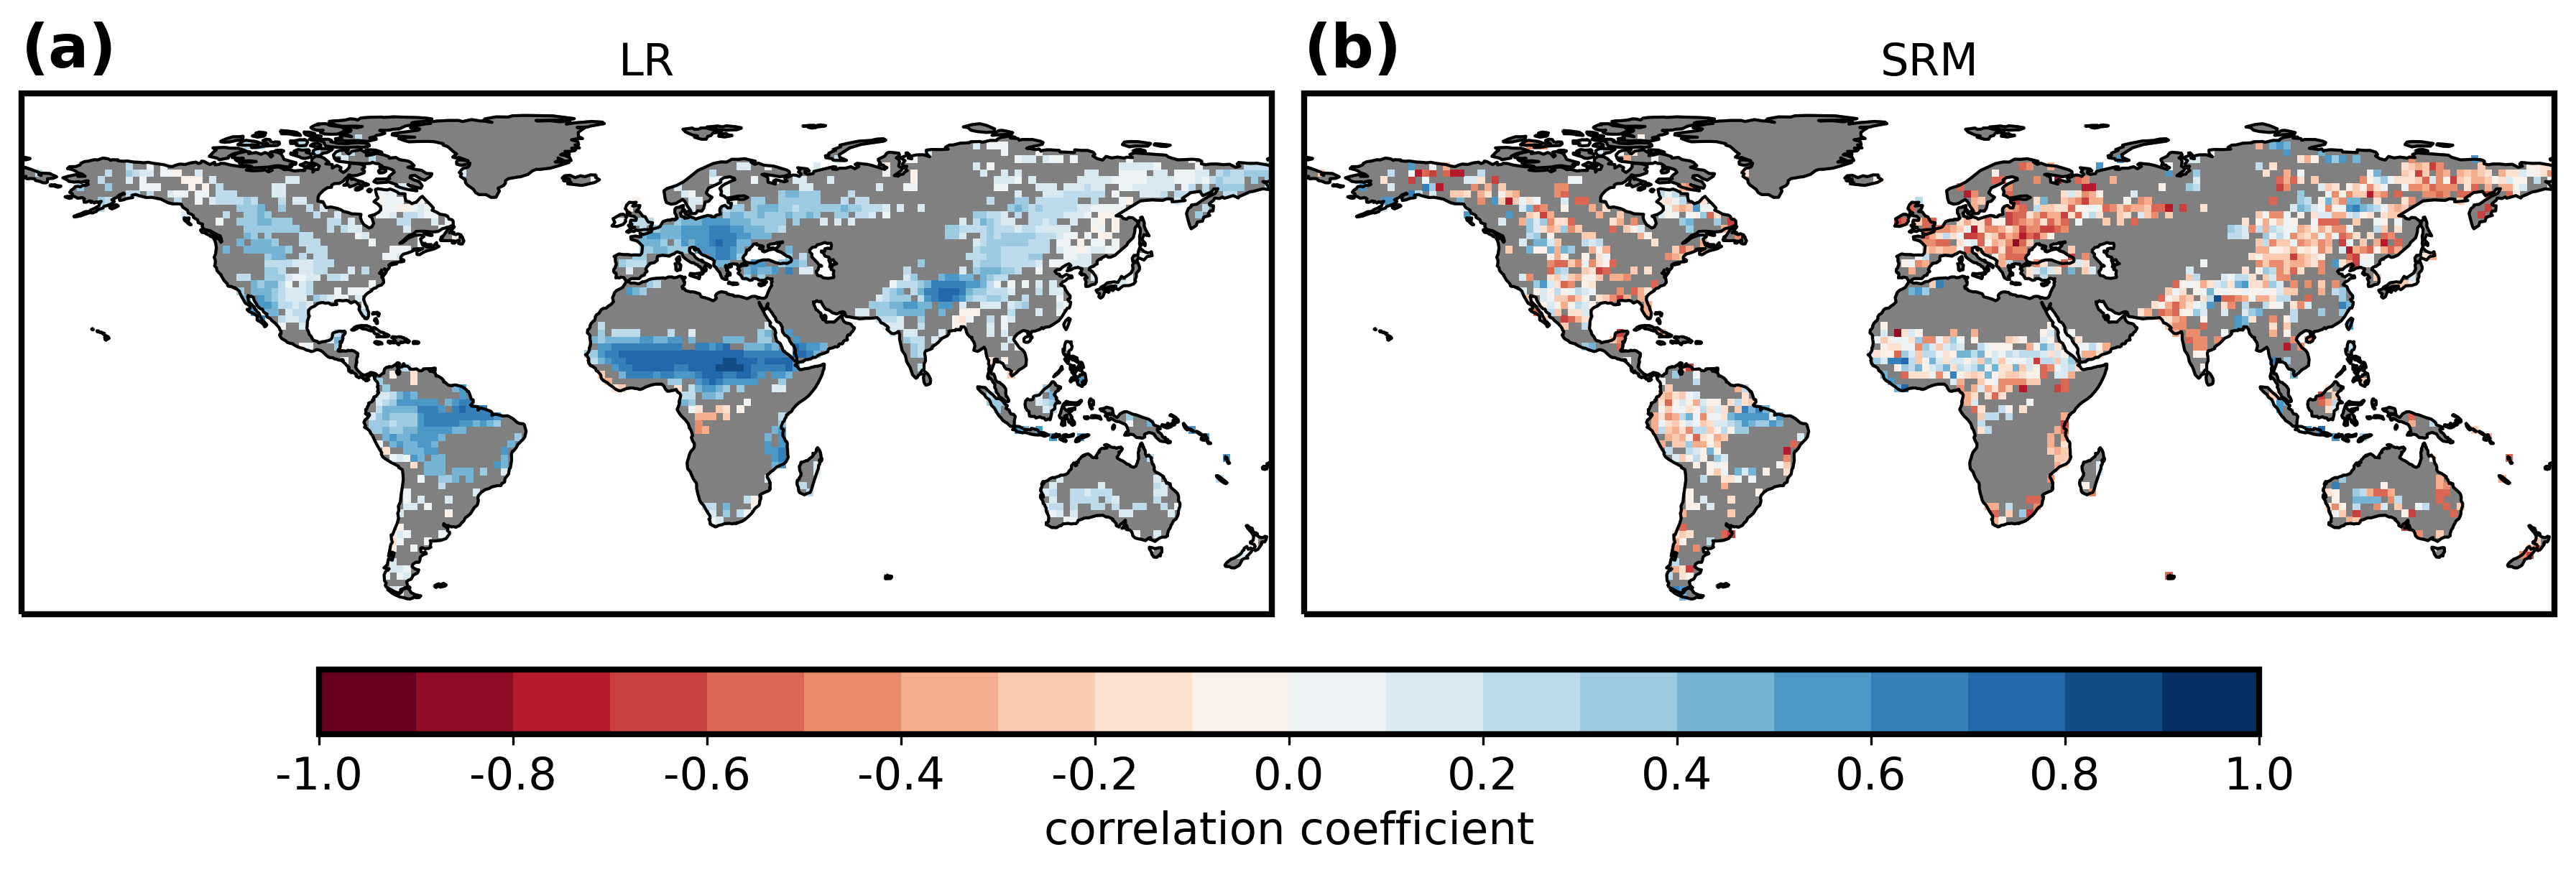

In [15]:
icon_plot1 = corr_pr_smi_move_icon
cmip_plot1 = corr_pr_smi_move_cmip

icon_plot1 = icon_plot1
cmip_plot1 = cmip_plot1
diff_plot1 = icon_plot1-cmip_plot1

txt_x, txt_y = 0.0, 1.05

rmax, cmax = 3, 3
fig, ax = plt.subplots(nrows=rmax,ncols=cmax, figsize=(18,10), subplot_kw={'projection': ccrs.PlateCarree()},)
matplotlib.rcParams['axes.linewidth'] = 2

#### first row #######
rr = 0
cc = 0
ax[rr,cc].set_extent(box, crs=ccrs.PlateCarree())
ax[rr,cc].coastlines(resolution='110m', color='k')
ax[rr,cc].add_feature(cartopy.feature.LAND, facecolor='grey')
img = ax[rr,cc].pcolor(CMIP_lon,CMIP_lat,cmip_plot1,transform=ccrs.PlateCarree(),edgecolors='None',
                       cmap=cmap_d, vmin = -1.,vmax = 1.,)
ax[rr,cc].set_title('LR', fontsize=15)
ax[rr,cc].text(txt_x, txt_y, '(a)', transform=ax[rr,cc].transAxes, size=20, weight='bold')

cc = 1
ax[rr,cc].set_extent(box, crs=ccrs.PlateCarree())
ax[rr,cc].coastlines(resolution='110m', color='k')
ax[rr,cc].add_feature(cartopy.feature.LAND, facecolor='grey')
img = ax[rr,cc].pcolor(CMIP_lon,CMIP_lat,icon_plot1,transform=ccrs.PlateCarree(),edgecolors='None',
                       cmap=cmap_d, vmin = -1.,vmax = 1.,)
ax[rr,cc].set_title('SRM', fontsize=15)
ax[rr,cc].text(txt_x, txt_y, '(b)', transform=ax[rr,cc].transAxes, size=20, weight='bold')

cc = 2
ax[rr,cc].set_visible(False)

cax = fig.add_axes([0.085, .65, 0.5, 0.03])
cbar = plt.colorbar(img, orientation='horizontal', fraction=0.050, pad=0.15, ax=ax[:,:], cax=cax)
cbar.set_ticks([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
cbar.set_ticklabels([-1.0,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0],fontsize=15)
cbar.set_label('correlation coefficient', fontsize=15)

#### second, third rows #######
for rr in np.arange(1,rmax):
    for cc in np.arange(cmax):
        ax[rr,cc].set_visible(False)


plt.tight_layout()